<a href="https://colab.research.google.com/github/surbhishaw1602/Iris_classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Iris Flower Classification**

**Objective:**

*The primary goal of this project is to perform machine learning techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements...*

IMPORT LIBARIES

In [ ]:
import os
import kagglehub

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,r2_score


LOAD DATASET

In [ ]:
dataset=kagglehub.dataset_download("saurabh00007/iriscsv")


100%|██████████| 1.28k/1.28k [00:00<00:00, 974kB/s]

Extracting files...


In [ ]:
os.listdir(dataset)

['Iris.csv']

In [ ]:
data=pd.read_csv(f'{dataset}/Iris.csv')

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


DATASET FIRST VIEW

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


DATASET ROW AND COLUMNS

In [ ]:
print("The number of rows in dataset:",data.shape[0])
print("The number of columns in dataset:",data.shape[1])

The number of rows in dataset: 150
The number of columns in dataset: 6


DATA INFORMATION

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


DUPLICATE VALUES CHECK

In [ ]:
d=data.duplicated().sum()

In [ ]:
print(f'Number of Duplicate values in dataset is : {d}')

Number of Duplicate values in dataset is : 0


MISSING VALUES CHECK

In [ ]:
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


KNOW ABOUT VARIABLE

In [ ]:
col=data.columns
print(col)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
for i in col :
  print("No of unique value in",i,"is",data[i].nunique())

No of unique value in Id is 150
No of unique value in SepalLengthCm is 35
No of unique value in SepalWidthCm is 23
No of unique value in PetalLengthCm is 43
No of unique value in PetalWidthCm is 22
No of unique value in Species is 3


In [ ]:
data['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


DROP VALUES

In [ ]:
data=data.drop("Id",axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


VISUALIZATION OF VARIABLE THROUGH CHARTS

/tmp/ipython-input-289545650.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


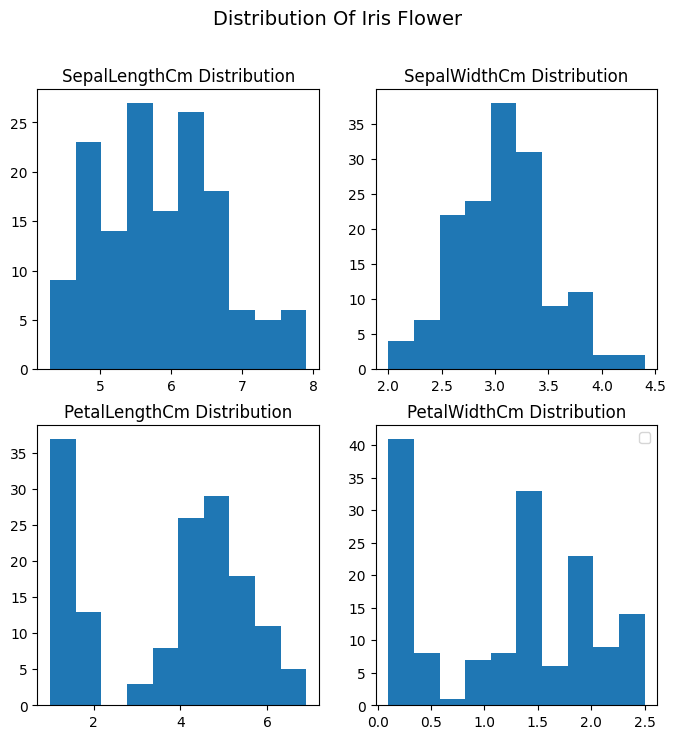

In [ ]:
plt.figure(figsize=(8, 8))
plt.suptitle('Distribution Of Iris Flower', fontsize=14)


plt.subplot(2,2,1)
plt.hist(data['SepalLengthCm'])
plt.title("SepalLengthCm Distribution")

plt.subplot(2,2,2)
plt.hist(data['SepalWidthCm'])
plt.title("SepalWidthCm Distribution")


plt.subplot(2,2,3)
plt.hist(data['PetalLengthCm'])
plt.title("PetalLengthCm Distribution")

plt.subplot(2,2,4)
plt.hist(data['PetalWidthCm'])
plt.title("PetalWidthCm Distribution")

plt.legend()


plt.show()


In [ ]:
sp=['Iris-setosa','Iris-versicolor','Iris-virginica']
color_map={
    'Iris-setosa':'pink',
    'Iris-versicolor':'blue',
    'Iris-virginica':'purple'
}

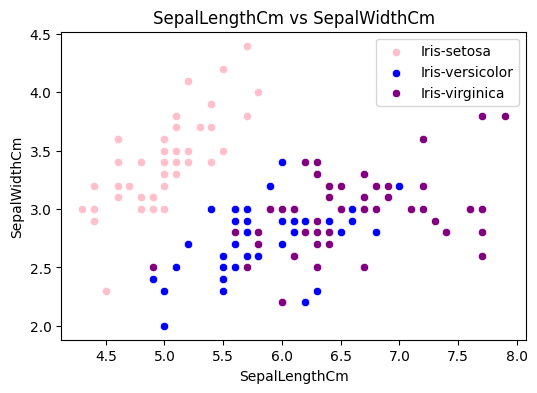

In [ ]:
plt.figure(figsize=(6,4))
for i in sp:
  special_data=data[data['Species']==i]
  sns.scatterplot(data=special_data,x='SepalLengthCm',y='SepalWidthCm',color=color_map[i],label=i)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("SepalLengthCm vs SepalWidthCm")
plt.legend()
plt.show()

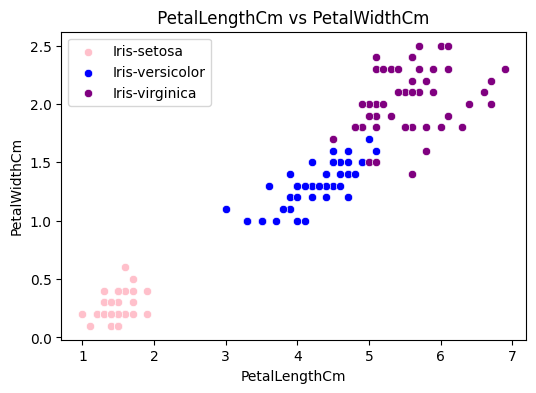

In [ ]:
plt.figure(figsize=(6,4))
for i in sp:
  special_data=data[data['Species']==i]
  sns.scatterplot(data=special_data,x='PetalLengthCm',y='PetalWidthCm',color=color_map[i],label=i)
plt.title(" PetalLengthCm vs PetalWidthCm ")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()
plt.show()


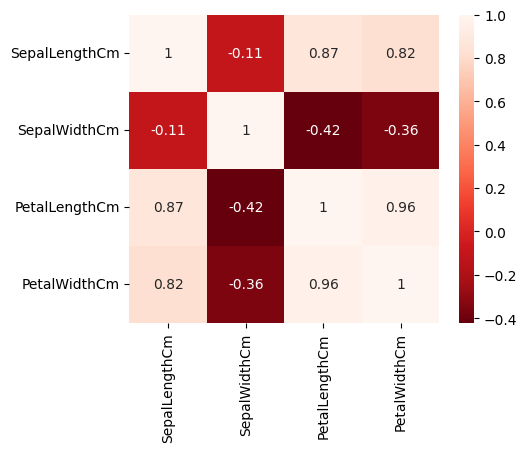

In [ ]:
corr_matrix=data.drop('Species',axis=1).corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix,annot=True,cmap='Reds_r')
plt.show()

CATEGORICAL ENCODING

In [ ]:
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
unique_data=data['Species'].unique()
print(f'No of unique values are {unique_data}')

No of unique values are [0 1 2]


FEATURE SCALING

In [ ]:
X=data.drop('Species',axis=1)
y=data.iloc[:,-1]
print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (150, 4)
Shape of y: (150,)


SPLITING THE X AND Y

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

MACHINE LEARNING MODEL - LOGISTIC MODEL

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

CALCULATE  ACCURACY , CLASSIFICATION REPORT AND CONFUSION MATRIX

In [ ]:
y_pred=lr.predict(X_train)
Accuracy=accuracy_score(y_train,y_pred)
Classifcation=classification_report(y_train,y_pred)
Confusion_Matrix=confusion_matrix(y_train,y_pred)


In [ ]:
print("Accuracy :",Accuracy*100)


Accuracy : 97.5


In [ ]:
print("Classification Report :\n",Classifcation)

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120



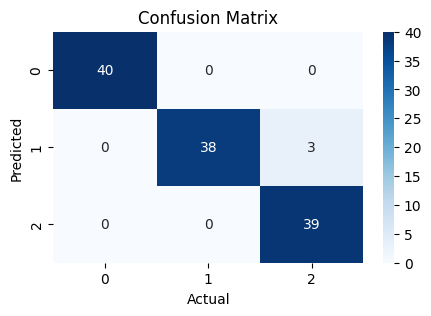

In [ ]:
from ast import cmpop
plt.figure(figsize=(5,3))
sns.heatmap(Confusion_Matrix,annot=True,cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
print("Counfusion Matrix :\n",Confusion_Matrix)

Counfusion Matrix :
 [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]


EVALUATION METRICS

In [ ]:
mse=mean_squared_error(y_train,y_pred)
mae=mean_absolute_error(y_train,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_pred)

In [ ]:
print("MSE :",mse)
print("MAE :",mae)
print("RMSE :",rmse)
print("R2 Score :",rmse)

MSE : 0.025
MAE : 0.025
RMSE : 0.15811388300841897
R2 Score : 0.15811388300841897
